<a href="https://colab.research.google.com/github/rachocr/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [ ]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)

1. Use any filter method to select the best features

##Mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = housing.data
y = housing.target

threshold = 5
high_score_features = []
feature_scores = mutual_info_regression(X, y, random_state=0)

print("Best Features:\n")
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
    print(f"{f_name}: {score}")
    high_score_features.append(f_name)

X_high_score = X[high_score_features]

print(X_high_score.columns)


Best Features:

Longitude: 0.4018195828289901
MedInc: 0.38764599736258987
Latitude: 0.3706566756286751
AveRooms: 0.10362300978707584
AveOccup: 0.07254907984228254
Index(['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup'], dtype='object')


2. Use any wrapper method to select the best features

##Recursive Feature Elimination

Best number of features: 6


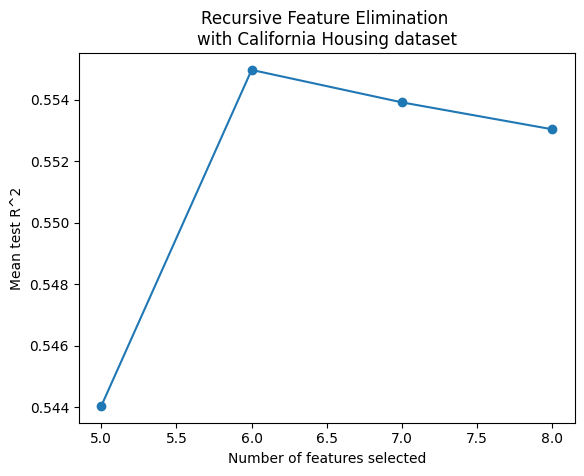


Best features selected:
MedInc
HouseAge
AveRooms
AveBedrms
Latitude
Longitude


In [ ]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)

X = housing.data
y = housing.target

min_features_to_select = 5
model = Ridge()
cv = KFold(5)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Best number of features: {rfecv.n_features_}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test R^2")

mean_test_scores = rfecv.cv_results_['mean_test_score']
n_features = range(min_features_to_select, len(mean_test_scores) + min_features_to_select)

plt.plot(n_features, mean_test_scores, marker='o')
plt.title("Recursive Feature Elimination \nwith California Housing dataset")
plt.show()

best_features = X.columns[rfecv.support_]
print("\nBest features selected:")
for feature in best_features:
    print(feature)

3. Use any embedded methood to select the best features

##Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=0).fit(X, y)

forest_feature_importance = pd.Series(forest_model.feature_importances_, index=X.columns)

# print("Feature Importance from Random Forest:")
# print(forest_feature_importance.sort_values(ascending=False))

top_forest_features = forest_feature_importance.sort_values(ascending=False).head(5)
print("Best Features from Random Forest:\n")
print(top_forest_features)

Best Features from Random Forest:

MedInc       0.520642
AveOccup     0.136854
Latitude     0.092836
Longitude    0.091147
HouseAge     0.052878
dtype: float64


#Prediction

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression, RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    return rmse

filter_features = ['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup']
X_train_filter = X_train[filter_features]
X_test_filter = X_test[filter_features]

wrapper_features = ['MedInc','HouseAge','AveRooms','AveBedrms','Latitude']
X_train_wrapper = X_train[wrapper_features]
X_test_wrapper = X_test[wrapper_features]

embedded_features = ['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge']
X_train_embedded = X_train[embedded_features]
X_test_embedded = X_test[embedded_features]

mi = mutual_info_regression(X_train_filter, y_train)
mi_sorted_idx = np.argsort(mi)[::-1]
top_5_mi_features = X_train_filter.columns[mi_sorted_idx][:5]

X_train_mi = X_train_filter[top_5_mi_features]
X_test_mi = X_test_filter[top_5_mi_features]
model = Ridge()
rmse_mi = evaluate_model(model, X_train_mi, X_test_mi, y_train, y_test)

rfecv = RFECV(estimator=Ridge(), step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train_wrapper, y_train)
top_5_rfecv_features = X_train_wrapper.columns[rfecv.support_][:5]

X_train_rfecv = X_train_wrapper[top_5_rfecv_features]
X_test_rfecv = X_test_wrapper[top_5_rfecv_features]
rmse_rfecv = evaluate_model(model, X_train_rfecv, X_test_rfecv, y_train, y_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_embedded, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train_embedded.columns)
top_5_rf_features = feature_importances.nlargest(5).index

X_train_rf = X_train_embedded[top_5_rf_features]
X_test_rf = X_test_embedded[top_5_rf_features]
rmse_rf = evaluate_model(model, X_train_rf, X_test_rf, y_train, y_test)

rmse_default = evaluate_model(model, X_train, X_test, y_train, y_test)

print("Performance for each feature selection method (RMSE):")
print(f"1. Default Model (All Features) - RMSE: {rmse_default}")
print(f"2. Filter Method (Mutual Information) - RMSE: {rmse_mi}")
print(f"3. Wrapper Method (Recursive Feature Elimination) - RMSE: {rmse_rfecv}")
print(f"4. Embedded Method (Random Forest) - RMSE: {rmse_rf}")

Performance for each feature selection method (RMSE):
1. Default Model (All Features) - RMSE: 0.7455222779992702
2. Filter Method (Mutual Information) - RMSE: 0.747795071207304
3. Wrapper Method (Recursive Feature Elimination) - RMSE: 0.7988459660615648
4. Embedded Method (Random Forest) - RMSE: 0.7401097523728755
